In [5]:
import scipy.io
import numpy as np
from scipy import interpolate, signal

n = range(64,95)

datafile = scipy.io.loadmat('/Users/kaylavokt/Desktop/Antonio/probe3_day12/ch75_check_anatomy.mat')
scipy.io.whosmat('/Users/kaylavokt/Desktop/Antonio/probe3_day12/ch75_check_anatomy.mat')
data_75 = datafile['data']
data_75 = data_75.squeeze()
print(data_75.shape)

datafile = scipy.io.loadmat('/Users/kaylavokt/Desktop/Antonio/probe3_day12/ch91_check_anatomy.mat')
scipy.io.whosmat('/Users/kaylavokt/Desktop/Antonio/probe3_day12/ch91_check_anatomy.mat')
data_91 = datafile['data']
data_91 = data_91.squeeze()
print(data_91.shape)

(21211547,)
(21211547,)


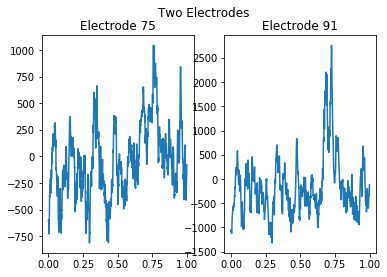

In [58]:
import matplotlib.pyplot as plt
import nelpy as nel
import nelpy.plotting as npl

time = np.arange(0,len(data_75))/1250

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Two Electrodes')

ax1.plot(time[0:int(1250*1)],data_75[0:int(1250*1)])
ax1.set_title("Electrode 75")

ax2.plot(time[0:int(1250*1)],data_91[0:int(1250*1)])
ax2.set_title("Electrode 91")
plt.show()

# Creating Epochs
small_section = nel.EpochArray([100,103])
preTrackSleep = nel.EpochArray([0,8750.6])
linearTrackSession = nel.EpochArray([8750.6,12231.4])
postTrackSleep = nel.EpochArray([12231.4,20823.3])


In [72]:
asa = nel.AnalogSignalArray(data=data_75,time=time)
asa = asa[small_section]

theta = [6, 12]
slow_gamma = [30, 55]
fast_gamma = [65, 100]

data_75_filt = []
data_91_filt = []
asa1 = nel.AnalogSignalArray(data=data_75,time=time)
asa1 = asa1[small_section]
asa2 = nel.AnalogSignalArray(data=data_91,time=time)
asa2 = asa2[small_section]

for i in range(2):
    if i == 0:
        data = data_75_filt
        asa = asa1
    elif i == 1:
        data = data_91_filt
        asa = asa2
    # Filtering Different Frequency Bands
    theta_data = nel.filtering.sosfiltfilt(asa,fl=theta[0],fh=theta[-1],)
    slow_gamma_data = nel.filtering.sosfiltfilt(asa,fl=slow_gamma[0],fh=slow_gamma[-1],)
    fast_gamma_data = nel.filtering.sosfiltfilt(asa,fl=fast_gamma[0],fh=fast_gamma[-1],)

    data.append(theta_data) 
    data.append(slow_gamma_data) 
    data.append(fast_gamma_data) 

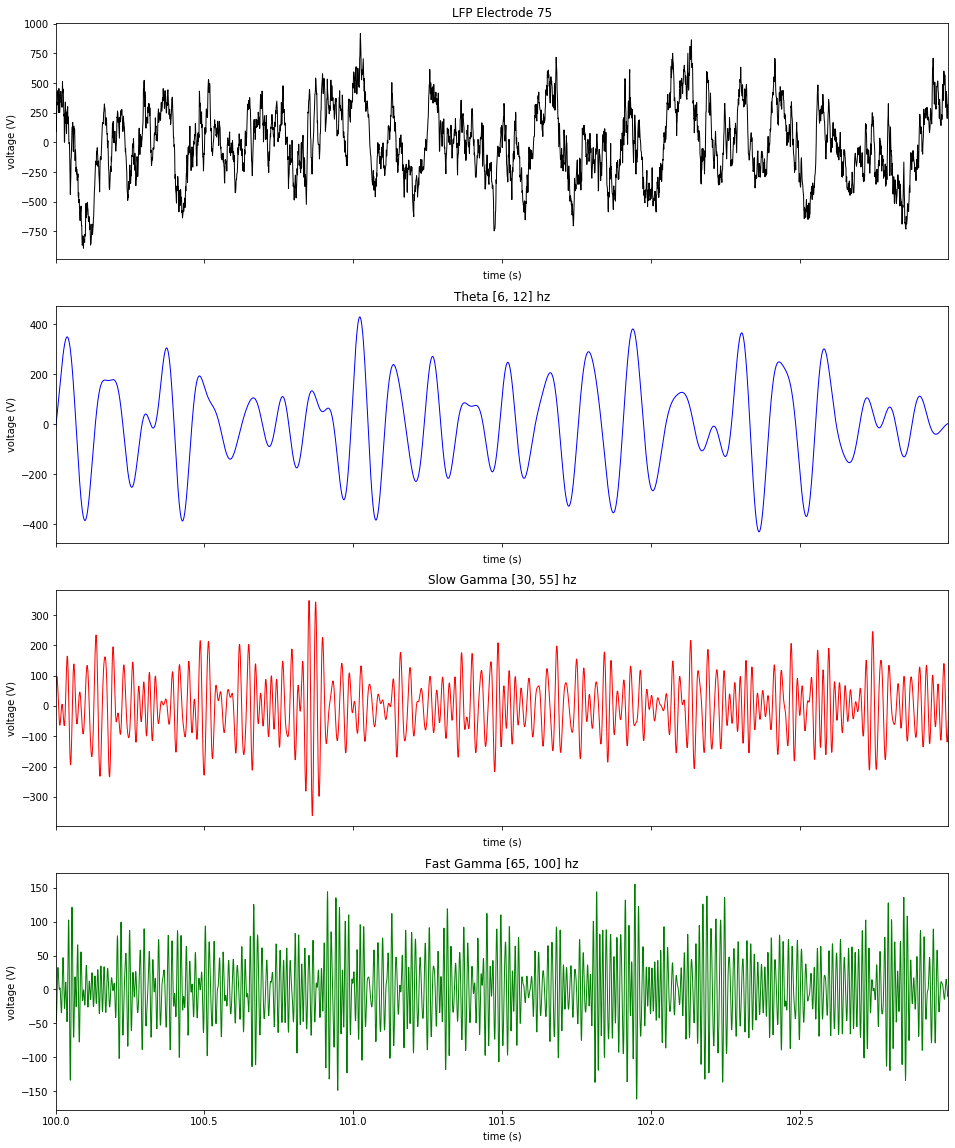

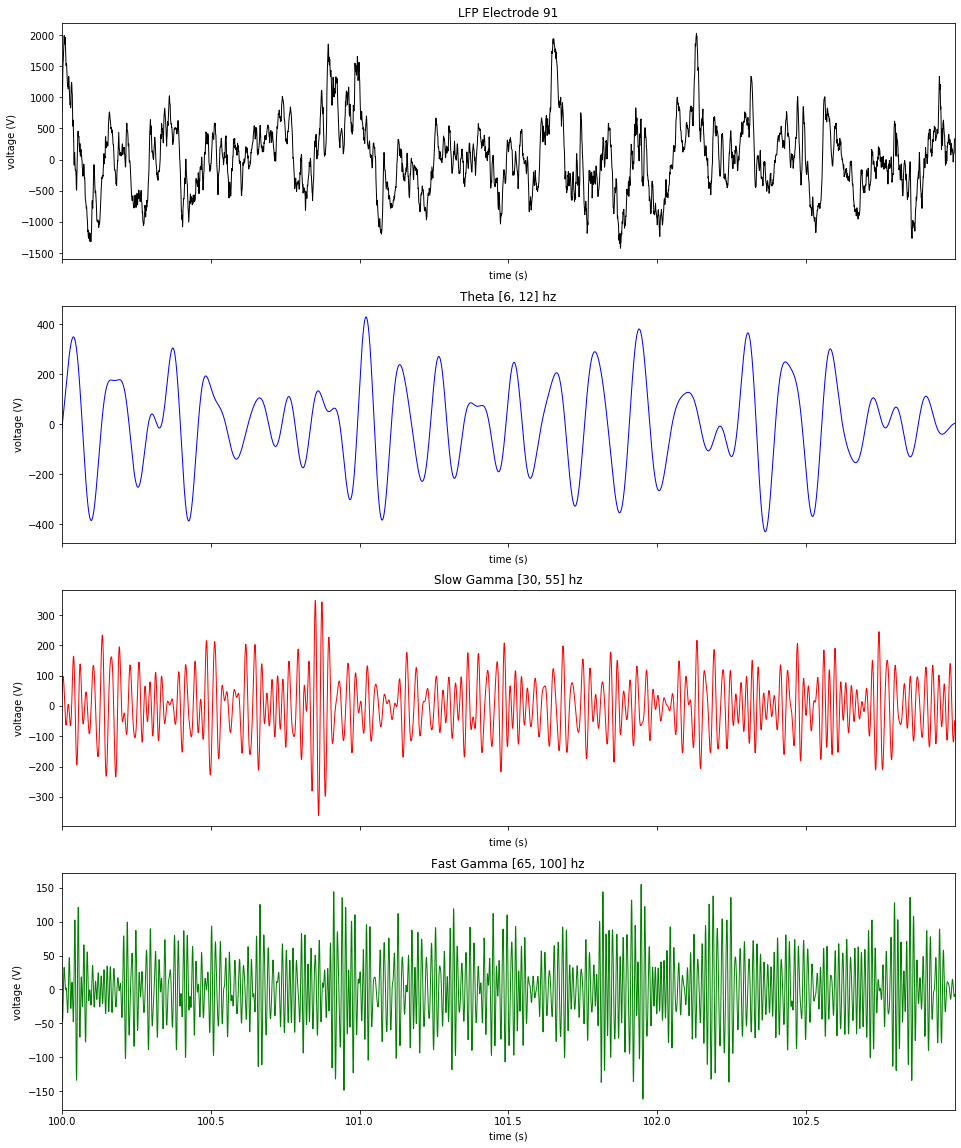

In [73]:
titles = ["Electrode 75", "Electrode 91"]

for i in range(2):
    if i == 0:
        data = data_75_filt
        asa = asa1
    elif i == 1:
        data = data_91_filt
        asa = asa2
    with npl.FigureManager(show=True, nrows=4, figsize=(16,20)) as (fig, axes):
        npl.utils.skip_if_no_output(fig)
        ax0, ax1, ax2, ax3 = axes
        for ax in axes:
            ax.set_ylabel('position (%)')

        npl.plot(asa, ax=ax0, lw=1, color='k')
        npl.plot(data_75_filt[0], ax=ax1, lw=1, color='b')
        npl.plot(data_75_filt[1], ax=ax2, lw=1, color='r')
        npl.plot(data_75_filt[2], ax=ax3, lw=1, color='g')

        npl.utils.no_xticklabels(ax0)
        npl.utils.no_xticklabels(ax1)
        npl.utils.no_xticklabels(ax2)

        ax0.set_title('LFP ' + titles[i])
        ax1.set_title('Theta ' + str(theta) + " hz")
        ax2.set_title('Slow Gamma ' + str(slow_gamma) + " hz")
        ax3.set_title('Fast Gamma ' + str(fast_gamma) + " hz")
    
